# Analysing Retail sector News using NLP during COVID-19

### Outcome of this project
Ideally the idea of this project to do topic modeling for the retail markets(Clothing, Food, Merchandise, sales). Above key words helped us to centre our topic in areas like retail management, Inventory handling, Supply Chain Management, Warehousing distibution network from Apr to Jul 2020. This period because of COVID-19 was crucial and hence this project speaks about following outcomes:

- What topics each document (or) news article belong ?
- What are the areas of improvement for any particular sector if identified?
- How many market clusters can be formed from the kind of news we aimed ?
- What category of customers are we focusing from the kind of news we fetched?

## 1.  Data extraction from Webhose API

Below code is used to extract the data from one of news data collecetion website: https://webhose.io/. We got 4 months of news for retail related keywords as seen below. Webhose uses specific querying technique to fetch JSON data.

### Query used to fetch data from webhose:

title:"retail" -text:('Customer Resource Management' OR 'Integrated Supply Chain' OR 'Supply chain management' OR 'Visual merchandising' OR
'merchandising' OR
'Warehouse management system' OR
'Cross Merchandising' OR
'Consignment Merchandise' OR
'Destination Retailer' OR
'Franchise'OR
'Franchis' OR
'Franchisee' OR
'High-Speed Retail' OR
'Inventory Management' OR
'Market Penetration' OR
'Market Research' OR
'Omni-Channel Retail' OR
'Social Commerce' OR
'Tribetailing' OR
'niche retailing' OR
'Inventory Management' OR
'Inventory Turnover') language:english site_type:news

- Customer Resource Management
- Integrated Supply Chain
- Supply chain management
- Visual merchandising
- merchandising
- Warehouse management system
- Cross Merchandising
- Consignment Merchandise
- Destination Retailer
- Franchise
- Franchis
- Franchisee
- High-Speed Retail
- Inventory Management
- Market Penetration
- Omni-Channel Retail
- Social Commerce
- Tribetailing
- niche retailing
- Inventory Management
- Inventory Turnover

In [ ]:
## Data Extraction code is fetched from webhose website



import webhoseio

webhoseio.config(token="5bbda080-5aac-4851-9b9e-c24143955c78")

query_params = {

"q": "title:\"retail\" -text:('Customer Resource Management' OR 'Integrated Supply Chain' OR 'Supply chain management' OR 'Visual merchandising' OR 'merchandising' OR 'Warehouse management system' OR 'Cross Merchandising' OR 'Consignment Merchandise' OR 'Destination Retailer' OR 'Franchise'OR 'Franchis' OR 'Franchisee' OR 'High-Speed Retail' OR 'Inventory Management' OR 'Market Penetration' OR 'Market Research' OR 'Omni-Channel Retail' OR 'Social Commerce' OR 'Tribetailing' OR 'niche retailing' OR 'Inventory Management' OR 'Inventory Turnover') language:english site_type:news",


}

output = webhoseio.query("filterWebContent", query_params)

print(output['posts'][0]['text']) # Print the text of the first post

print(output['posts'][0]['published']) # Print the text of the first post publication date

# Get the next batch of posts

output = webhoseio.get_next()

# Print the site of the first post

print(output['posts'][0]['thread']['site'])





## 2. Data Transformation

The Data transformatin phase involves flattening the data from JSON files for each month to a single .CSV file.

### Input files:

- 17747_webhose_2020_04_9f0f66b0d8a5cf37ba19f9ffa9db57b3_0000001.json
- 17747_webhose_2020_05_9f0f66b0d8a5cf37ba19f9ffa9db57b3_0000001.json
- 17747_webhose_2020_06_9f0f66b0d8a5cf37ba19f9ffa9db57b3_0000001.json
- 17747_webhose_2020_06_9f0f66b0d8a5cf37ba19f9ffa9db57b3_0000001.json

### Output file:

- mergedjsondata.csv

### Sample JSON Document (or) row:

{
	"organizations": [],
	"uuid": "977e7f90f8f26a3d8261b72ab097e39f47f2b329",
	"thread": {
		"social": {
			"gplus": {
				"shares": 0
			},
			"pinterest": {
				"shares": 0
			},
			"vk": {
				"shares": 0
			},
			"linkedin": {
				"shares": 0
			},
			"facebook": {
				"likes": 0,
				"shares": 0,
				"comments": 0
			},
			"stumbledupon": {
				"shares": 0
			}
		},
		"site_full": "www.floorcoveringweekly.com",
		"main_image": "https://westchestermedicalcenter.com",
		"site_section": "https://www.floorcoveringweekly.com/",
		"section_title": "Home - NEW | Home | Floor Covering Weekly ",
		"url": "https://www.floorcoveringweekly.com/Main/retail1.aspx",
		"country": "US",
		"title": "Retail",
		"performance_score": 0,
		"site": "floorcoveringweekly.com",
		"site_categories": ["financial_news", "finance"],
		"participants_count": 1,
		"title_full": "",
		"spam_score": 0.002,
		"site_type": "news",
		"published": "2020-07-07T03:00:00.000+03:00",
		"replies_count": 0,
		"uuid": "977e7f90f8f26a3d8261b72ab097e39f47f2b329"
	},
	"author": "anonymous",
	"url": "https://www.floorcoveringweekly.com/Main/retail1.aspx",
	"ord_in_thread": 0,
	"title": "Retail",
	"locations": [],
	"entities": {
		"persons": [{
				"name": "conover",
				"sentiment": "none"
			}, {
				"name": "mallory cruise-mcgrath",
				"sentiment": "none"
			}, {
				"name": "amy rush-imber",
				"sentiment": "none"
			}
		],
		"locations": [{
				"name": "n.c.",
				"sentiment": "none"
			}, {
				"name": "omaha",
				"sentiment": "none"
			}, {
				"name": "n.h.",
				"sentiment": "none"
			}, {
				"name": "ga.",
				"sentiment": "none"
			}, {
				"name": "atlanta",
				"sentiment": "none"
			}, {
				"name": "united states",
				"sentiment": "none"
			}, {
				"name": "neb.",
				"sentiment": "none"
			}, {
				"name": "manchester",
				"sentiment": "none"
			}, {
				"name": "adairsville",
				"sentiment": "none"
			}, {
				"name": "western n.c.",
				"sentiment": "none"
			}, {
				"name": "kennesaw",
				"sentiment": "none"
			}
		],
		"organizations": [{
				"name": "nascar",
				"sentiment": "none"
			}, {
				"name": "cca global",
				"sentiment": "none"
			}, {
				"name": "nfm",
				"sentiment": "none"
			}, {
				"name": "nebraska furniture mart",
				"sentiment": "none"
			}, {
				"name": "american home surfaces group",
				"sentiment": "none"
			}
		]
	},
	"highlightText": "",
	"language": "english",
	"persons": [],
	"text": "Startown relies on strengths during COVID-19 Tuesday, July 7, 2020\n[Conover, N.C.] As a leading flooring retailer in the Hickory and Western N.C. markets, Startown Carpet, member of American Home Surfaces Group (AHSG)... Read More Stainmaster & NFM together transform retail Wednesday, July 1, 2020\n[Kennesaw, Ga.] Earlier this year, Nebraska Furniture Mart, based in Omaha, Neb., re-energized the Stainmaster brand on the retail floor addressing to... Read More CCA Global: Marketing Magic Monday, June 29, 2020\nBy Amy Rush-Imber and Mallory Cruise-McGrath [Manchester, N.H.] Sound marketing strategies have never been more important and CCA Global — inclu... Read More Retail sales plummet; insights point positive Wednesday, June 17, 2020\n[Atlanta] As the COVID-19 pandemic continues to take an unfathomable human toll in the United States, retail sales saw one of the worst periods in mod... Read More DWF sponsors NASCAR Truck Series Thursday, June 11, 2020\n[Adairsville, Ga.] Dalton Wholesale Floors (DWF) is diversifying its marketing efforts by supporting sporting events like the NASCAR Truck Series.&nbs... Read More Retailers work to put safety first Wednesday, June 3, 2020\nAs a result COVID-19 outbreak and current steps for reopening, floor covering companies are putting best practices into place that keep not only... Read More Lowe’s keeps Pros working Monday, June 1, 2020\n[Mooresville, N.C.] In an effort to help keep Pros working, Lowe’s has unveiled the first step in its previously announced $25 million commitment to s... Read More The Return of Retail Tuesday, May 19, 2020\nBy Kacey Perinelli & Morgan Bulman Following the institution of stay-at-home orders first issued back in March, many states have now started... Read More How retailers are prepping to open post-pandemic Monday, May 11, 2020\nBy Kacey Perinelli & Morgan Bulman Following the institution of stay-at-home orders, which were first issued back in March, many states have... Read More Uncertain recovery, retail to lag for months Wednesday, May 6, 2020\n[Atlanta] With overall retail sales plummeting due to the COVID-19 global pandemic, industry experts are bracing for continued impacts across many sec... Read More",
	"external_links": [],
	"published": "2020-07-07T03:00:00.000+03:00",
	"crawled": "2020-07-08T04:10:36.032+03:00",
	"highlightTitle": ""
}


### Columns in flattened CSV file:

uuid
thread_social_gplus_shares,
thread_social_pinterest_shares,
thread_social_vk_shares,
thread_social_linkedin_shares,
thread_social_facebook_likes,
thread_social_facebook_shares,
thread_social_facebook_comments,
thread_social_stumbledupon_shares,
thread_site_full,
thread_main_image,
thread_site_section,
thread_section_title,
thread_url,
thread_country,
thread_title,
thread_performance_score,
thread_site,
thread_site_categories_0,
thread_participants_count,
thread_title_full,
thread_spam_score,
thread_site_type,
thread_published,
thread_replies_count,
thread_uuid,
author,
url,
ord_in_thread,
title,
entities_persons_0_name,
entities_persons_0_sentiment,
entities_organizations_0_name,
entities_organizations_0_sentiment,
entities_organizations_1_name,
entities_organizations_1_sentiment,
entities_organizations_2_name,
entities_organizations_2_sentiment,
highlightText,
language,
text


In [1]:
## This block is to be run in different notebook if you intend to generate the file right away. As this might hang this 
## notebook if the machine is not capable

from pandas.io.json import json_normalize
import json
import pandas as pd
import os


def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

def transform_json():
    for fname in os.listdir(os.getcwd()+'\data'):
        if fname.endswith(".json"):
            df = pd.DataFrame()
            
            with open(os.getcwd()+'\\data\\'+fname, 'r', encoding="UTF-8") as f:
                lines = f.readlines()
    
    
            with open(os.getcwd()+'\\data\\finaljson\\' + fname, "w", encoding="UTF-8") as fw:
                print('[', file=fw)
                i=0
                for line in lines:
                    if(i < len(lines)-1 ):
                        print(line + ",", file=fw)
                    i+=1
                print(line,file=fw )   
                print(']', file=fw)

def load_json(inputfileName):
    jsonlist = []
               
    with open(os.getcwd()+'\\data\\'+inputfileName, 'r', encoding="UTF-8") as f:
        for line in f:
            jsonlist.append(json.loads(line))
                    
    return (jsonlist)


df = pd.DataFrame()
for fname in os.listdir(os.getcwd()+'\data'):
    if fname.endswith(".json"): 
        x = load_json(fname)  
        df1 = pd.DataFrame([flatten_json(t) for t in x])
        df = df.append(df1, ignore_index=True)
        #df[df.index.apply(lambda x: x.isnumeric())]
#print(df.index)
    
#print(df.columns)
#print(df['text'])
    
collist= df.columns
df_head = df.head()
df_head.to_csv('df_head.csv', index=True)
    
news = df['text'].tolist()
df_news = pd.DataFrame(news, columns = ["entities_text"])
df_news.to_csv('df_news.csv', index = True)
    
df_collist = pd.DataFrame(collist, columns=["colummns_list"])
df_collist.to_csv('collist.csv', index=True)
df.to_csv('mergedjsondata.csv')

##  Data modeling and transformation

In [2]:
## Importing all the necessary modeling, transformation, feture Engineering, cleaning, algorithmic Python packages
import os
#import chardet   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
import math
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Activation, Dropout
#from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk import word_tokenize
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras.utils.np_utils import to_categorical

#os.path.abspath(os.getcwd())+'\\' + 'mergedjsondata.csv'

### Checking the format of the csv format as per ASNI standards

import os
import chardet    
rawdata = open(os.path.abspath(os.getcwd())+'\\' + 'mergedjsondata_sliced.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

In [6]:
df['text'].head()

0    Bayside Shoes for Life\nDiabetic Shoes and sho...
1    COVID-19 impacts & reshapes retail Over the la...
2    Retail Sales Job Arena\nEntry level sales posi...
3    Managing director Nati Harpaz exits Catch\nNat...
4     House to Home stages home environs where ever...
Name: text, dtype: object

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Parsing the file
#df = pd.read_excel('Webhose.xls')

df = pd.read_csv(os.path.abspath(os.getcwd())+'\\' + 'mergedjsondata_sliced_utf8.csv',encoding='utf8')

C:\Users\AMANI GOLI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,

In [8]:
df.shape

(41285, 1073)

In [9]:
# Longer block
# Convert text column to list
print((df.text.tolist()))

document = df.text.values.astype('U').tolist()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
# Dumping the original text column as list to a pickle file
pickle.dump(document, open('document.dat', 'wb')) 

In [12]:
# Create a duplicate column for original text column
df['original_text'] = df['text']

# Data Cleaning

In [13]:
# English Contractions
dict_contractions = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# RE to find Contractions
contractions_reg=re.compile('(%s)' % '|'.join(dict_contractions.keys()))

# Function for expanding contractions
def expand_contractions(text,dict_contractions=dict_contractions):
  def replace(match):
    return dict_contractions[match.group(0)]
  return contractions_reg.sub(replace, text)

# Expanding Contractions in the reviews

df['text']=df['text'].astype('str').apply(lambda x:expand_contractions(x))

In [14]:
## Trimming and Lemmatization
# removing everything except alphabets`
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

# removing short words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Tokenization
tokenized_df = df['text'].apply(lambda x: x.split())

# remove stop words
tokenized_df = tokenized_df.apply(lambda x: [item for item in x if item not in stop_words])

# de-Tokenization
detokenized_df = []
for i in range(len(df)):
    t = ' '.join(tokenized_df[i])
    detokenized_df.append(t)

df['clean_text'] = detokenized_df

In [16]:
cleaned_df = df[['uuid','clean_text','original_text']]

In [9]:
import pickle
cleaned_df.to_pickle('cleaned_df.pkl')

In [8]:
cleaned_df.head()

,uuid,clean_text,original_text
0,0bec306c531c33455f6b41296f27f53c96c5f5c6,bayside shoes life diabetic shoes shoes people...,Bayside Shoes for Life\nDiabetic Shoes and sho...
1,977e7f90f8f26a3d8261b72ab097e39f47f2b329,covid impacts reshapes retail last months expe...,COVID-19 impacts & reshapes retail Over the la...
2,1e397b4b493bfe5084bf2a09b2792305251fd1da,retail sales arena entry level sales position ...,Retail Sales Job Arena\nEntry level sales posi...
3,c46b5d01a08d66c21ad5f4a3f09ddeb508797841,managing director nati harpaz exits catch nati...,Managing director Nati Harpaz exits Catch\nNat...
4,a7f8fa953c23a5c6eb20f5232d429e0adf863e75,house home stages home environs everything sal...,House to Home stages home environs where ever...


In [4]:
cleaned_df.head()

,uuid,clean_text,original_text
0,0bec306c531c33455f6b41296f27f53c96c5f5c6,bayside shoes life diabetic shoes shoes people...,Bayside Shoes for Life\nDiabetic Shoes and sho...
1,977e7f90f8f26a3d8261b72ab097e39f47f2b329,covid impacts reshapes retail last months expe...,COVID-19 impacts & reshapes retail Over the la...
2,1e397b4b493bfe5084bf2a09b2792305251fd1da,retail sales arena entry level sales position ...,Retail Sales Job Arena\nEntry level sales posi...
3,c46b5d01a08d66c21ad5f4a3f09ddeb508797841,managing director nati harpaz exits catch nati...,Managing director Nati Harpaz exits Catch\nNat...
4,a7f8fa953c23a5c6eb20f5232d429e0adf863e75,house home stages home environs everything sal...,House to Home stages home environs where ever...


In [3]:
cleaned_df = pd.read_pickle(os.path.abspath(os.getcwd())+'\\' + 'cleaned_df.pkl')

## Exploratory Data Analysis

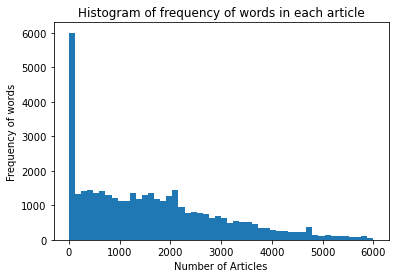

In [18]:
# Code Snippet for Article Length Histogram

def plot_article_length_histogram(text):
    plt.hist(text.str.len(), bins = 50, range=(0, 6000))
    plt.title('Histogram of frequency of words in each article')
    plt.xlabel('Number of Articles')
    plt.ylabel('Frequency of words')
    plt.savefig('articlelenhist.png')
    plt.show()

plot_article_length_histogram(cleaned_df['clean_text'])

#plt.hist(df['text'].str.split().map(lambda x: len(x)), bins = 50, range=(0, 2000))
#plt.show()

In [19]:
## Sentiment Polarity
cleaned_df['sentiment'] = cleaned_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
cleaned_df.head()

<ipython-input-19-259e138575b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment'] = cleaned_df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


,uuid,clean_text,original_text,sentiment
0,0bec306c531c33455f6b41296f27f53c96c5f5c6,bayside shoes life diabetic shoes shoes people...,bayside shoes life diabetic shoes shoes people...,0.044444
1,977e7f90f8f26a3d8261b72ab097e39f47f2b329,covid impacts reshapes retail last months expe...,covid impacts reshapes retail over last months...,0.193172
2,1e397b4b493bfe5084bf2a09b2792305251fd1da,retail sales arena entry level sales position ...,retail sales arena entry level sales position ...,0.287500
3,c46b5d01a08d66c21ad5f4a3f09ddeb508797841,managing director nati harpaz exits catch nati...,managing director nati harpaz exits catch nati...,0.131790
4,a7f8fa953c23a5c6eb20f5232d429e0adf863e75,house home stages home environs everything sal...,house home stages home environs where everythi...,0.294910


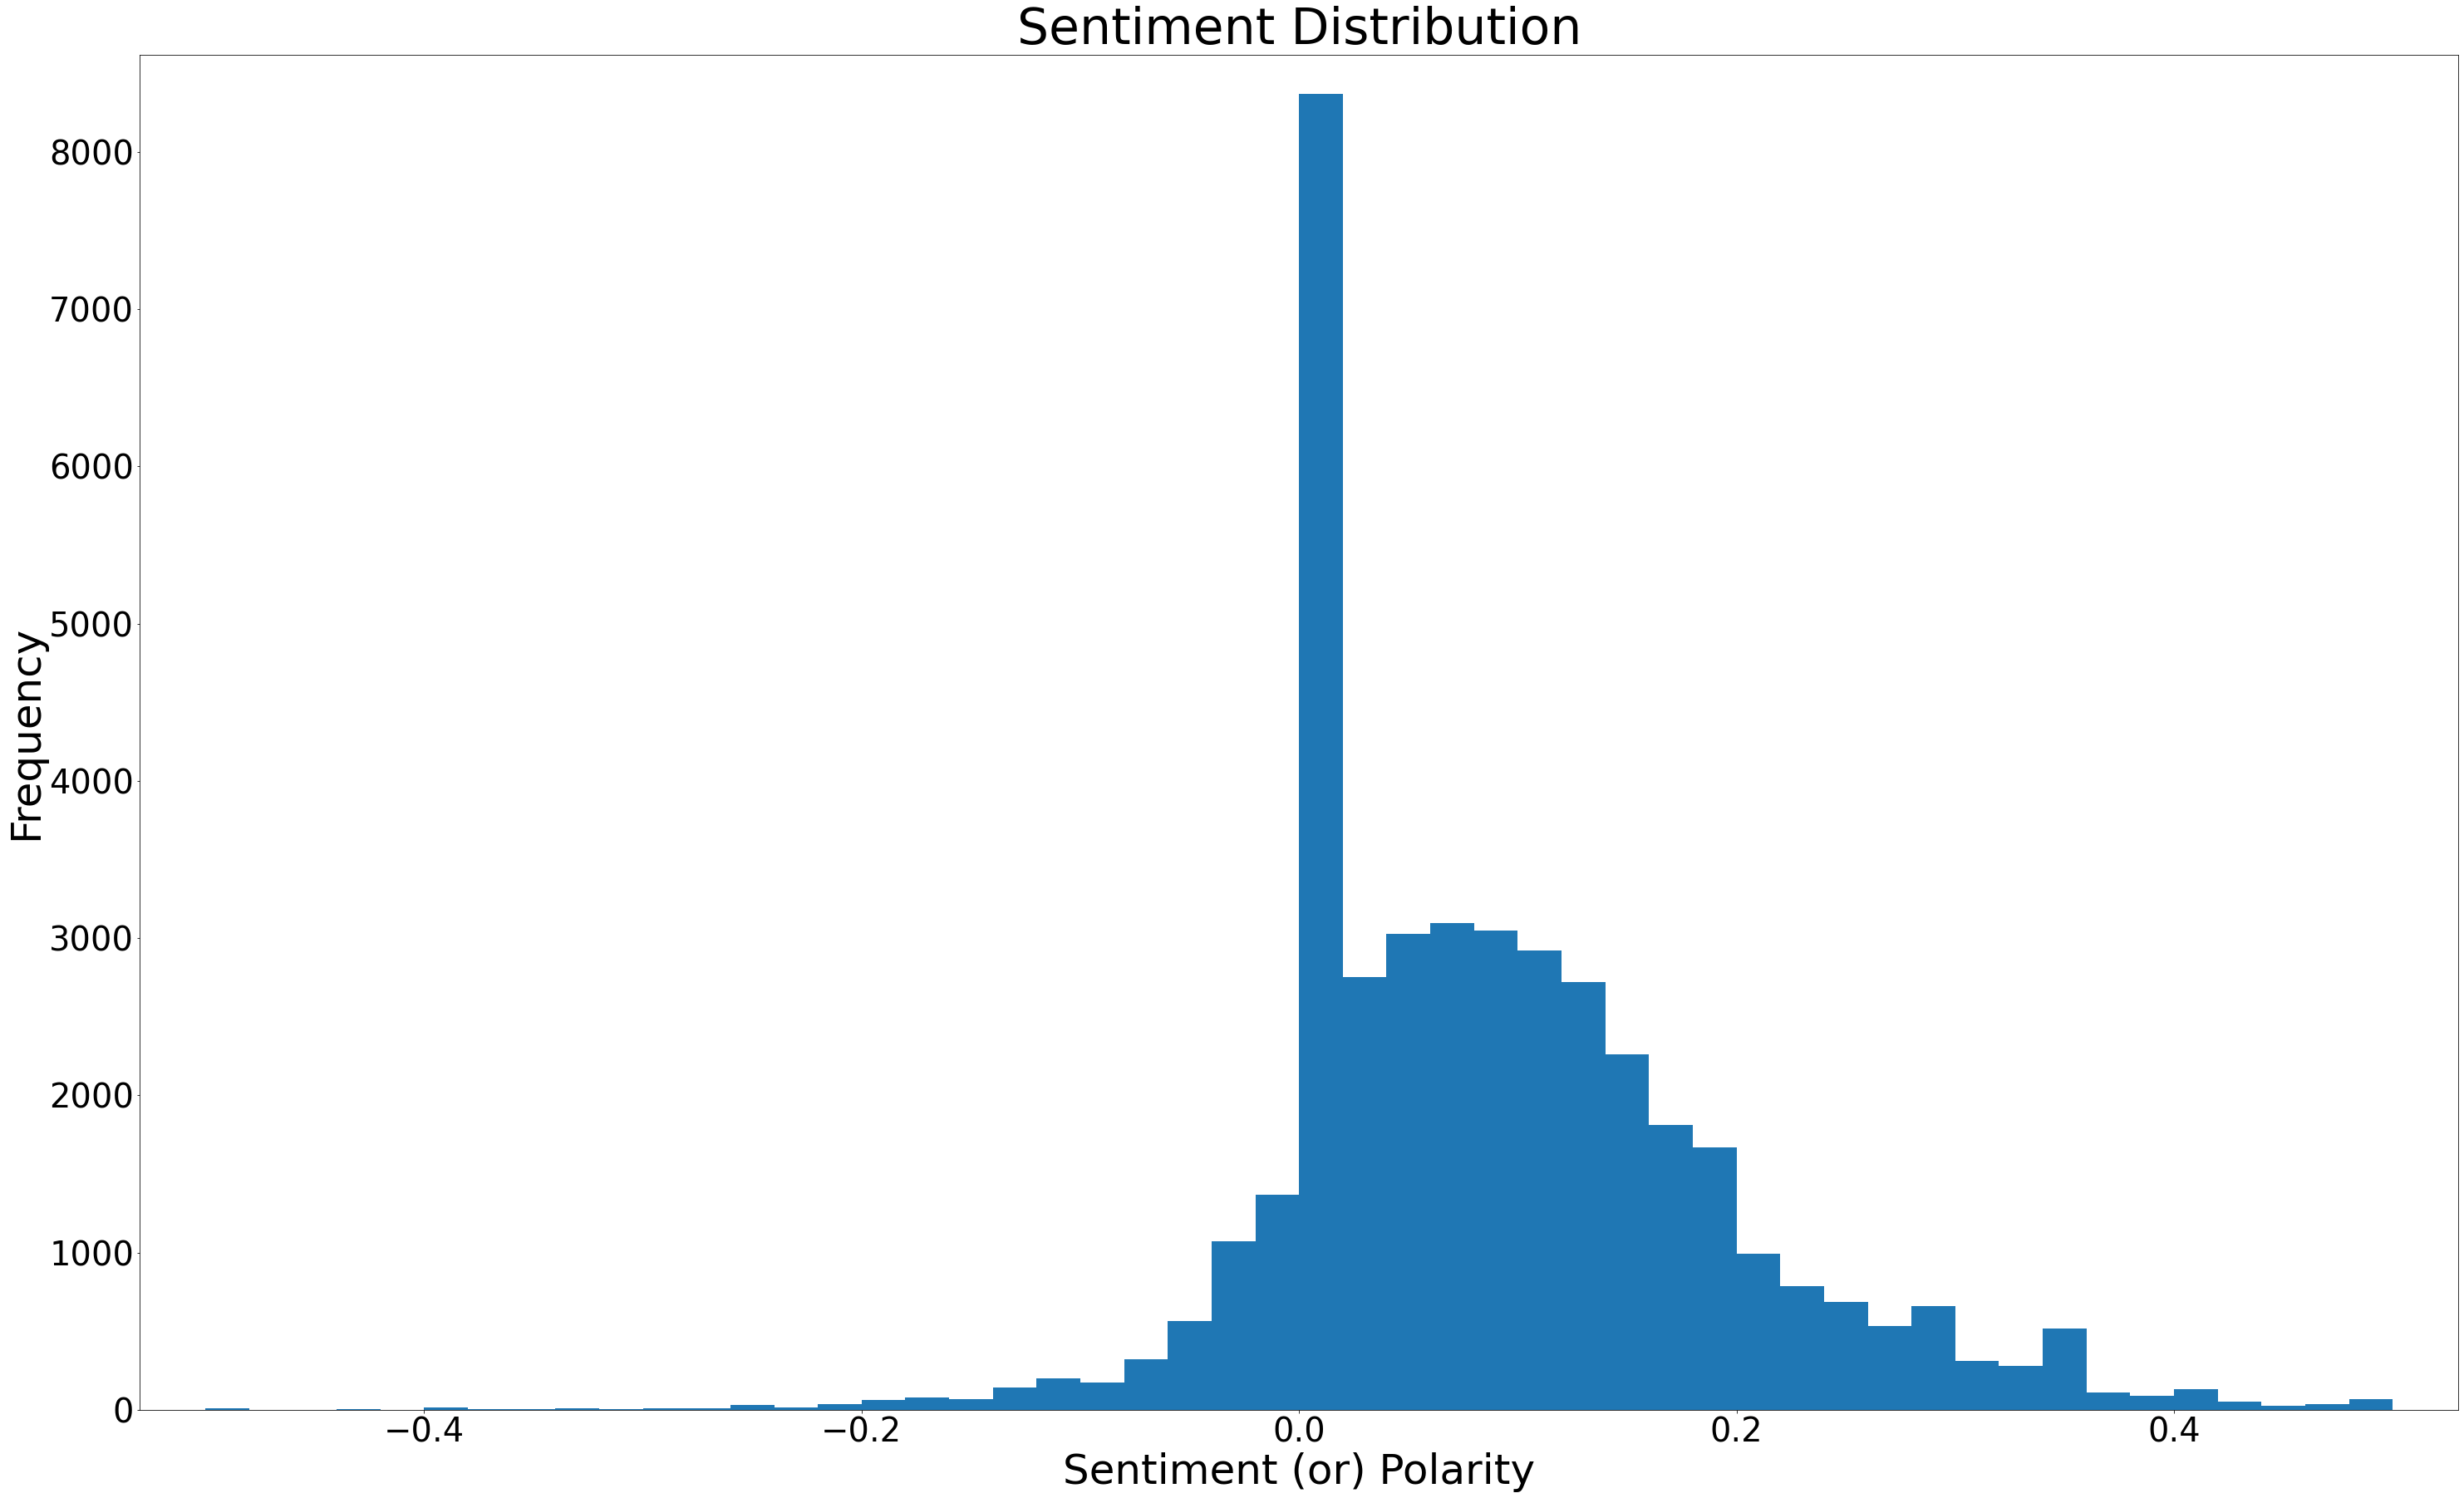

In [20]:
## Sentiment Histogram Distribution
plt.figure(figsize=(50,30))
plt.margins(0.03)
plt.xlabel('Sentiment (or) Polarity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(cleaned_df['sentiment'], bins=50, range=(-0.5, 0.5))
plt.title('Sentiment Distribution', fontsize=60)
plt.savefig('sentimenthist.png')
plt.show()

In [55]:
from wordcloud import WordCloud
from textwrap import wrap

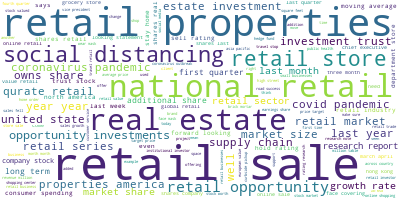

In [56]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(cleaned_df['clean_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
wordcloud.to_file('wordcloud.png')

In [21]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

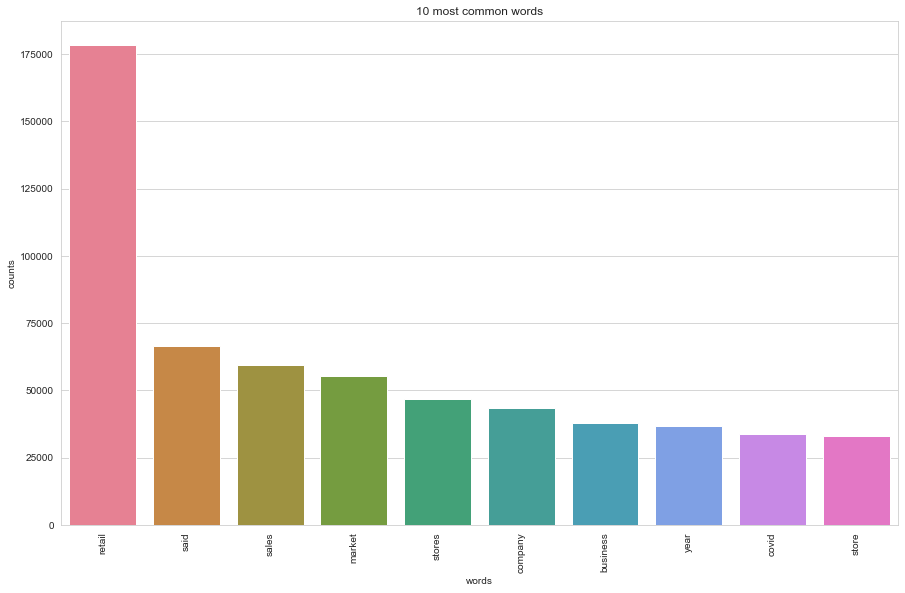

In [22]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(cleaned_df['clean_text'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [23]:
cleannews_list=[]
news= cleaned_df['clean_text'].str.split()
news=news.values.tolist()
cleannews_list=[word for i in news for word in i]
stop=set(stopwords.words('english'))

In [24]:
from collections import defaultdict
news_dic=defaultdict(int)
for word in cleannews_list:
    if word in stop:
        dic[word]+=1

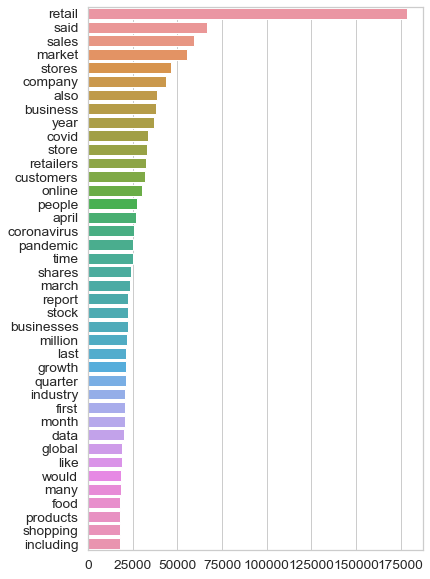

In [25]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

counter=Counter(cleannews_list)
mostlist =counter.most_common()

x, y= [], []
for word,count in mostlist[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
plt.figure(figsize=(6, 10))        
sns.barplot(x=y,y=x )


# Latent Dirichlet Allocation (LDA Algorithm)

In [18]:
## LDA  
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
#from sklearn.lda import LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(cleaned_df['clean_text'])
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

# load the pre-prepared pyLDAvis data from disk to html
with open(data_filepath, 'rb') as f:
    gensimdata = pickle.load(f)
pyLDAvis.save_html(gensimdata, os.path.abspath(os.getcwd())+'\\'+'ldavis_prepared_'+str(number_topics) +'.html')
## After this above block the html file would have been generated in current working directory starting with ldavis_prepared and with 
## extension .html, This helps in understanding LDA from end-to end

Topics found via LDA:

Topic #0:
said retail stores covid businesses people health coronavirus state open

Topic #1:
retail store customers experience online customer time retailers people love

Topic #2:
retail market global growth business table report industry company product

Topic #3:
retail shares company stock properties quarter rating price investment research

Topic #4:
retail sales year said stores month april percent march cent


In [19]:
print(lda)

LatentDirichletAllocation(n_components=5, n_jobs=-1)


In [20]:
lda_output = lda.fit_transform(count_data)

# Sample text

In [21]:
test_dict = {'Sample_text': ['Apply An exceptional opportunity has arisen for a highly creative thinker and designer at senior level with a global retail group that specializes in future-oriented solutions for retail. A vast majority of their established clients are within the food-retail sector, but projects also cross over to luxury retail, beauty and hospitality. You would be joining the newest office in east London which is run by an industry leader with a great portfolio of experience.The successful candidate will have like-for-like sector experience, preferably from a leading design studio. This role would suit someone who is both strategic and highly creative conceptually. You will have branding experience in 3-D interiors and will be able to take your concepts and translate them into visuals.This role is yours for the making and you will be joining what is to be the creative hub of this award-winning business. Key Responsibilities Lead design projects within UK and across Europe. Brainstorm design strategies alongside the Creative Director Create holistic designs that encompass branding, concept development, strategy, store design, and visual merchandising. Prepare concepts with look and feel, material specification and hand sketched. Translate initial concepts into the 3-D visuals for client presentation. Some development of large format spatial planning and fixtures and fittings. Skills and Experience BA in Interior Design or related credited field. Proven experience in high-end food retail or branded retail environments. Portfolio that highly demonstrates creative thinking and the concept phase of the design process. Confident to work to own initiative. Experience in managing a team of designer. Ability to work to tight deadlines and adaptable. Proficient in Cinema4D, Photoshop, InDesign is essential. Knowledge in AutoCAD or Vectorworks and SketchUp. Hand-sketching is crucial. Strong communication skills are essential. Bilingualism is an asset - fluent German would be a particular advantage. Bespoke Careers is acting as an Employment Agency in relation to this vacancy and is an Equal Opportunities Employer. By applying to this role you agree to our Privacy Policy',
                             'Reatil sales in 2021 will diminish'],
        'Topic': ['NA','NAN']
        }

df_test = pd.DataFrame(test_dict, columns = ['Sample_text', 'Topic'])

print (df_test)

                                         Sample_text Topic
0  Apply An exceptional opportunity has arisen fo...    NA
1                 Reatil sales in 2021 will diminish   NAN


In [22]:
# predict topics for test data
# unnormalized doc-topic distribution df_test['Sample_text']
X_test = count_vectorizer.transform(df_test['Sample_text'])

In [23]:
doc_topic_dist_unnormalized = np.matrix(lda.transform(X_test))

In [24]:
# normalize the distribution (only needed if you want to work with the probabilities)
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)
topic_num= doc_topic_dist.argmax(axis=1)

In [25]:
df_test['Topic']= pd.Series(v[0] for v in topic_num)
df_test['Topic'] = df_test['Topic'].astype(int)


In [26]:
df_test

,Sample_text,Topic
0,Apply An exceptional opportunity has arisen fo...,0
1,Reatil sales in 2021 will diminish,2


In [ ]:
data_filepath = os.path.join(os.path.abspath(os.getcwd())+'\\'+'ldavis_prepared_'+str(number_topics))

with open(data_filepath, 'wb') as f:
        pickle.dump(gensimdata, f)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

# This block takes 2-3 hours to run (This generates the gensim interactive visualization)
gensimdata = pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer)

In [ ]:
# load the pre-prepared pyLDAvis data from disk to html -- these are already in the above block just putting seperate blocks for understanding
with open(data_filepath, 'rb') as f:
    gensimdata = pickle.load(f)
pyLDAvis.save_html(gensimdata, os.path.abspath(os.getcwd())+'\\'+'ldavis_prepared_'+str(number_topics) +'.html')
## After this above block the html file would have been generated in current working directory starting with ldavis_prepared and with 
## extension .html, This helps in understanding LDA from end-to end

# KMeans

In [26]:
### KMeans 

## Elbow Test for checking the clusters (K = 2) - Takes longer
## http://brandonrose.org/clustering

from sklearn.cluster import KMeans

#Removing stop words and vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_df.clean_text.tolist())

# word_features = vectorizer.get_feature_names()
# print(len(word_features))
# print(word_features[5000:5100])

<ipython-input-27-9a6412e286b0>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  elbow.show()


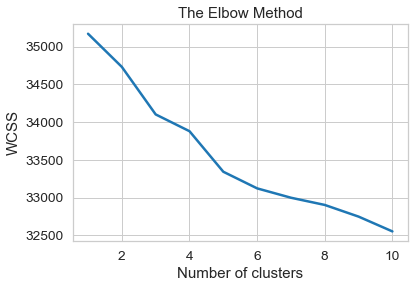

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.cluster import KMeans
def plotelbow(data):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbow.png')
    elbow = plt.figure(3)
    elbow.show()
    
plotelbow(X)

In [32]:
## KMeans Clustering Modeling

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
    
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
#print(terms)

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
 
print('\n')
print('Prediction')

['aaaa', 'aaazy', 'aabanks', 'aabc', 'aacaf', 'aacenter', 'aachen', 'aacoexec', 'aacsb', 'aaczfuyiw', 'aadbsjgf', 'aadc', 'aadhaar', 'aadhar', 'aaditya', 'aaea', 'aaeee', 'aafa', 'aafapemqbdtb', 'aafsajlw', 'aagard', 'aagkinfjigaiyhglwmjbh', 'aahealth', 'aahk', 'aahmoryta', 'aahytiws', 'aaii', 'aair', 'aajduvkgprymmfziusesm', 'aajzyqq', 'aakar', 'aakash', 'aakeem', 'aalborg', 'aalesh', 'aalishaan', 'aaliyah', 'aalten', 'aalvote', 'aamal', 'aams', 'aanalyst', 'aanbod', 'aanchal', 'aandacht', 'aangeenbrug', 'aangevuld', 'aanl', 'aanpassingen', 'aansturing', 'aantal', 'aanvruqgeb', 'aanwerving', 'aaof', 'aaom', 'aaosqshzebelnz', 'aapa', 'aapd', 'aapi', 'aapimage', 'aapk', 'aapke', 'aapl', 'aaprtl', 'aardvark', 'aarey', 'aarhus', 'aarmstrong', 'aarn', 'aarogya', 'aaron', 'aarons', 'aaronson', 'aarqq', 'aars', 'aarti', 'aarts', 'aasb', 'aasect', 'aashish', 'aasqy', 'aata', 'aatac', 'aati', 'aatma', 'aatmanirbhar', 'aauzjdemfijsdwrrabedz', 'aave', 'aavin', 'aavishkaar', 'aavriti', 'aawb', 'a

In [ ]:
X_pred = vectorizer.transform(['Shares given in the company should be equally' + 
                               'divided as per experience in retail markets'])
predicted = model.predict(X_pred)
print(predicted)